In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os

plt.rcParams['font.sans-serif'] = 'SimHei' # 设置中文显示
plt.rcParams['axes.unicode_minus'] = False

In [2]:
project_path = os.path.join(os.getcwd(), os.pardir)
data_dir = os.path.join(project_path, 'data')
result_dir = os.path.join(project_path, 'result')

In [3]:
lr = pd.read_csv(os.path.join(data_dir, 'LR.csv'))
financial_data = pd.read_csv(os.path.join(data_dir, 'financial_data.csv'))
financial_data_new = pd.read_csv(os.path.join(data_dir, 'financial_data_new.csv'))
stk_ind = pd.read_csv(os.path.join(data_dir, 'Stk_ind.csv'), encoding='gbk')
target_data = pd.read_excel(os.path.join(data_dir, 'target_data.xlsx'))
test = pd.read_csv(os.path.join(data_dir, 'test.csv'))
zcfz = pd.read_csv(os.path.join(data_dir, 'ZCFZ.csv'))

# 财务数据处理

## task1.1 筛选 'Typrep'

In [4]:
# LR.csv 数据预处理
lr

,Stkcd,Accper,Typrep,B001100000,B001101000,Bbd1102000,Bbd1102101,Bbd1102203,B0i1103000,B0i1103101,...,B002300000,B002000000,B002000101,B002000201,B003000000,B004000000,B005000000,B006000000,B006000101,B006000102
0,600696,2018-3-31,B,2.037196e+06,2.037196e+06,NaN,NaN,NaN,NaN,NaN,...,NaN,3.102472e+05,NaN,NaN,NaN,NaN,NaN,3.102472e+05,NaN,NaN
1,600696,2018-3-31,A,1.878459e+07,1.878459e+07,NaN,NaN,NaN,NaN,NaN,...,NaN,7.060818e+06,6730614.54,3.302030e+05,0.0200,0.0200,NaN,7.060818e+06,6.730615e+06,3.302030e+05
2,547,2018-3-31,B,3.023424e+05,3.023424e+05,NaN,NaN,NaN,NaN,NaN,...,NaN,-7.674035e+06,NaN,NaN,NaN,NaN,-1098000.0,-8.772035e+06,NaN,NaN
3,547,2018-3-31,A,5.179452e+08,5.179452e+08,NaN,NaN,NaN,NaN,NaN,...,NaN,8.492637e+07,79787795.49,5.138571e+06,0.0600,0.0600,-1098000.0,8.382837e+07,7.868980e+07,5.138571e+06
4,2772,2018-3-31,B,4.432953e+07,4.432953e+07,NaN,NaN,NaN,NaN,NaN,...,NaN,2.317076e+07,NaN,NaN,NaN,NaN,NaN,2.317076e+07,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
66381,600759,2019-1-1,A,3.326314e+09,3.326314e+09,NaN,NaN,NaN,NaN,NaN,...,NaN,2.064974e+08,69625085.41,1.368723e+08,0.0308,0.0308,97365943.3,3.038633e+08,1.633149e+08,1.405485e+08
66382,570,2018-12-31,B,1.968727e+09,1.968727e+09,NaN,NaN,NaN,NaN,NaN,...,NaN,6.427872e+07,NaN,NaN,NaN,NaN,-250662875.0,-1.863842e+08,NaN,NaN
66383,200570,2018-12-31,B,1.968727e+09,1.968727e+09,NaN,NaN,NaN,NaN,NaN,...,NaN,6.427872e+07,NaN,NaN,NaN,NaN,-250662875.0,-1.863842e+08,NaN,NaN
66384,570,2018-12-31,A,2.139273e+09,2.139273e+09,NaN,NaN,NaN,NaN,NaN,...,NaN,6.255485e+07,62409528.46,1.453238e+05,0.1112,0.1112,-250662875.0,-1.881080e+08,-1.882533e+08,1.453238e+05


In [5]:
# 缺失值
lr[['Stkcd', 'Accper', 'Typrep']].isna().sum()
# 重复值
lr[['Stkcd', 'Accper', 'Typrep']].duplicated().sum()
# 异常值暂无

0

In [6]:
data = ['Stkcd',
        'Accper',
        'Typrep',
        'B001000000',
        'B001100000',
        'B001101000',
        'B001200000',
        'B001201000',
        'B001207000',
        'B001209000',
        'B001210000',
        'B001211000',
        'B001212000',
        'B001303000',
        'B002300000']
lr_1 = lr[lr['Typrep'] == 'A'][data]
lr_1.to_csv(os.path.join(result_dir, 'LR_1.csv'), encoding='utf-8')

In [7]:
lr_1.shape

(33414, 15)

## task 1.2

In [8]:
# zcfz，stk_ind数据预处理，缺失值，重复值，异常值
zcfz.isna().sum()
zcfz.duplicated().sum()

stk_ind.isna().sum()
stk_ind.duplicated().sum()

0

In [9]:
# 需要 zcfc 中与 LR_1 中三字段相同部分的进行合并
need_part = zcfz[['Stkcd', 'Accper', 'Typrep','A002000000', 'A001000000']]
lr_2 = lr_1.merge(need_part, on=['Stkcd', 'Accper', 'Typrep'], how='left', suffixes=('A002000000', 'A001000000'))
lr_2 = lr_2.merge(stk_ind, on=['Stkcd'], how='left')
lr_2.to_csv(os.path.join(result_dir, 'LR_2.csv'), encoding='utf-8')

In [10]:
lr_2.shape

(33414, 19)

## task 1.3

In [11]:
lens = len(lr_2)
print(lens, len(lr_2.columns))
drops = []
for col in range(len(lr_2.columns)):
    na_num = lr_2.iloc[:, col].isna().sum()
    if na_num / lens > 0.7:
        drops.append(col)
print(drops)
lr_3 = lr_2.drop(columns=lr_2.columns[drops])
lr_3.to_csv(os.path.join(result_dir, 'LR_3.csv'), encoding='utf-8')

33414 19
[13, 14]


In [12]:
print(len(lr_3.columns))

17


## task 1.4

In [13]:
lr_4 = lr_3.dropna()
lr_4.to_csv(os.path.join(result_dir, 'LR_4.csv'), encoding='utf-8')
lr_4.shape[0]

30888

## task 1.5

In [14]:
# 日期格式转换
lr_5 = lr_4.copy()
lr_5['Accper'] = pd.to_datetime(lr_4['Accper']).dt.strftime('%Y-%m-%d')
lr_5.to_csv(os.path.join(result_dir, 'LR_5.csv'), encoding='utf-8')

## task 1.6

In [15]:
lr_6 = lr_5.copy()
lr_6['利润率'] = lr_6['B001000000'] / lr_6['B001100000'] * 100
lr_6['资产负债率'] = lr_6['A002000000'] / lr_6['A001000000'] * 100
selected = ((lr_6['利润率'] < 300) & (lr_6['利润率'] > (-300))) | \
        ((lr_6['资产负债率'] < 300) & (lr_6['资产负债率'] > (-300)))
lr_6 = lr_6[selected]
lr_6.to_csv(os.path.join(result_dir, 'LR_new.csv'), encoding='utf-8')

In [16]:
print(lr_6.shape)
lr_6[['Stkcd', '利润率', '资产负债率']].head(5)

(30882, 19)


,Stkcd,利润率,资产负债率
0,600696,46.150938,59.524425
1,547,18.681072,22.588596
2,2772,33.512902,34.062300
4,818,19.188844,32.569762
5,300568,62.315561,52.085464


# task 2 数据指标分析及其可视化

## task 2.1 绘制 “行业营业利润对比分析” 图

In [17]:
# 各行业2019年9月利润总额均值
lr_new = lr_6.copy()
lr_new['Accper'] = pd.to_datetime(lr_new['Accper'])
lr_new['year'] = lr_new['Accper'].dt.year
lr_new['month'] = lr_new['Accper'].dt.month
lr_new.rename(columns={'B001000000' : '利润总额'},inplace=True)

In [18]:
lr_new

,Stkcd,Accper,Typrep,利润总额,B001100000,B001101000,B001200000,B001201000,B001207000,B001209000,...,B001211000,B001212000,A002000000,A001000000,Indnme,Nindnme,利润率,资产负债率,year,month
0,600696,2018-03-31,A,8.669264e+06,1.878459e+07,1.878459e+07,1.068992e+07,7.810739e+06,2.045951e+05,2.815107e+05,...,1.154311e+05,1.742760e+04,4.437834e+08,7.455484e+08,房地产,房地产业,46.150938,59.524425,2018,3
1,547,2018-03-31,A,9.675773e+07,5.179452e+08,5.179452e+08,4.266916e+08,2.729517e+08,7.893870e+05,1.265716e+07,...,2.518201e+06,3.276349e+06,1.681114e+09,7.442314e+09,工业,信息技术业,18.681072,22.588596,2018,3
2,2772,2018-03-31,A,8.953362e+07,2.671617e+08,2.671617e+08,1.898233e+08,1.527985e+08,6.940502e+05,3.013340e+07,...,-3.692930e+06,-9.415898e+04,1.422487e+09,4.176132e+09,综合,农业,33.512902,34.062300,2018,3
4,818,2018-03-31,A,1.741463e+08,9.075395e+08,9.075395e+08,7.338691e+08,6.535983e+08,1.533694e+07,2.484191e+07,...,3.701614e+06,1.631376e+06,1.322972e+09,4.061964e+09,工业,化学原料及化学制品制造业,19.188844,32.569762,2018,3
5,300568,2018-03-31,A,1.069983e+08,1.717039e+08,1.717039e+08,1.212891e+08,8.066557e+07,2.874172e+06,3.784963e+06,...,6.086240e+06,7.791617e+05,1.485785e+09,2.852590e+09,工业,化学原料及化学制品制造业,62.315561,52.085464,2018,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33409,600506,2019-06-30,A,-2.744250e+06,4.442804e+06,4.442804e+06,7.190498e+06,4.339892e+06,2.968723e+05,6.017868e+05,...,-1.118478e+06,-9.751695e+04,1.556010e+07,2.945354e+08,综合,农业,-61.768421,5.282930,2019,6
33410,600198,2019-01-01,A,5.740263e+08,2.343849e+09,2.343849e+09,3.081832e+09,1.752037e+09,2.267352e+07,2.031544e+08,...,2.704493e+08,-2.900063e+08,6.769485e+09,7.370695e+09,工业,信息技术业,24.490750,91.843241,2019,1
33411,600759,2019-01-01,A,4.263121e+08,3.326314e+09,3.326314e+09,2.859020e+09,1.090341e+09,7.232009e+08,2.515532e+08,...,5.552119e+08,-1.054669e+08,9.220438e+09,1.470193e+10,工业,石油和天然气开采业,12.816351,62.715821,2019,1
33412,570,2018-12-31,A,7.614446e+07,2.139273e+09,2.139273e+09,2.183846e+09,1.818679e+09,1.256209e+07,1.269971e+08,...,-9.128147e+05,3.758814e+07,1.481532e+09,3.546080e+09,工业,普通机械制造业,3.559362,41.779431,2018,12


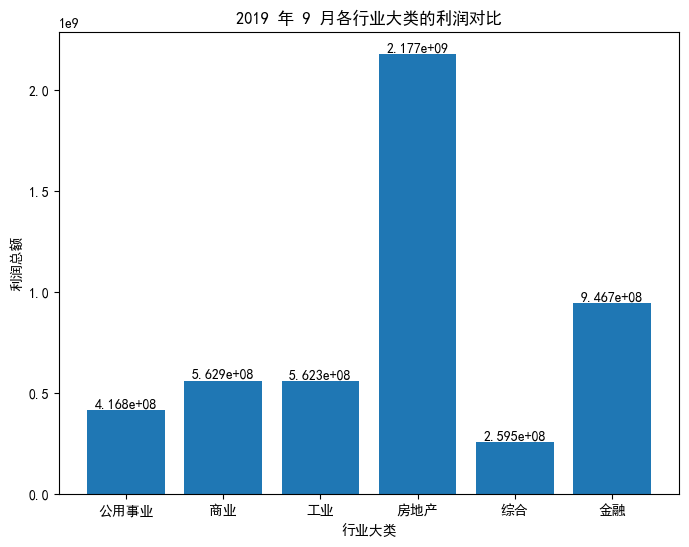

In [19]:
pic_data1 = lr_new[(lr_new['year']==2019) & (lr_new['month']==9)].groupby('Indnme').agg({'利润总额' : 'mean'})
plt_data = pic_data1.loc[:, '利润总额']

# 绘图
plt.figure(figsize=(8,6))
plt.bar(np.arange(len(plt_data)), height=plt_data)
plt.title('2019 年 9 月各行业大类的利润对比')
plt.xticks(range(len(plt_data)), labels=pic_data1.index)
for i in range(len(plt_data)):
    plt.text(x=i, y=plt_data.iloc[i], s=f'{plt_data[i]:.3e}', va='bottom', ha='center')
plt.xlabel('行业大类')
plt.ylabel('利润总额')
plt.savefig(os.path.join(result_dir, 'task2_1_1.png'))
plt.show()

In [20]:
select = ((lr_new['year']==2018) & (lr_new['month']>=1)) |\
        ((lr_new['year']==2019) & (lr_new['month']<=9))
pic_data1 = lr_new[select].groupby(['Indnme', 'year', 'month']).agg({'利润率':'mean'})
pic_data1 = pic_data1['利润率']
pic_data1

Indnme  year  month
公用事业    2018  1        11.153533
              3        11.500195
              6        13.337083
              9        12.174944
              12       -7.054665
        2019  1        -2.312600
              3         5.868644
              6         4.143106
              9         5.961718
商业      2018  1         5.701136
              3         6.373535
              6         3.675896
              9         2.664921
              12       -5.851198
        2019  1         2.962627
              3        24.446529
              6         2.446601
              9         0.741328
工业      2018  1         6.547588
              3         5.938506
              6         6.428780
              9         7.461762
              12       -1.712145
        2019  1         1.283824
              3         2.729617
              6        -0.676751
              9         1.706439
房地产     2018  1        15.958510
              3         4.927125
              6        

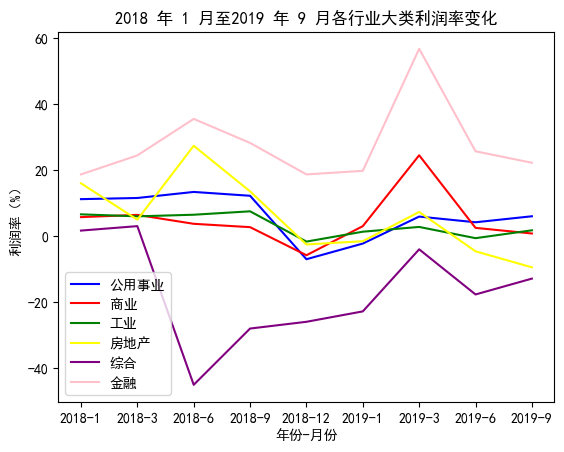

In [21]:
colors = ['blue', 'red', 'green', 'yellow', 'purple', 'pink']
for i in range(len(pic_data1.index.levels[0])):
    data = pic_data1[[x for x in range(i*9, (i+1)*9)]]
    data.index = [f'{year}-{month}' for _, year, month in data.index]
    plt.plot(data, color=colors[i], label=pic_data1.index.levels[0][i])
plt.title('2018 年 1 月至2019 年 9 月各行业大类利润率变化')
plt.xticks(range(9), labels=data.index)
plt.xlabel('年份-月份')
plt.ylabel('利润率（%）')
plt.legend()
plt.savefig(os.path.join(result_dir, 'result2_1_2.png'))
plt.show()

## task 2.2 


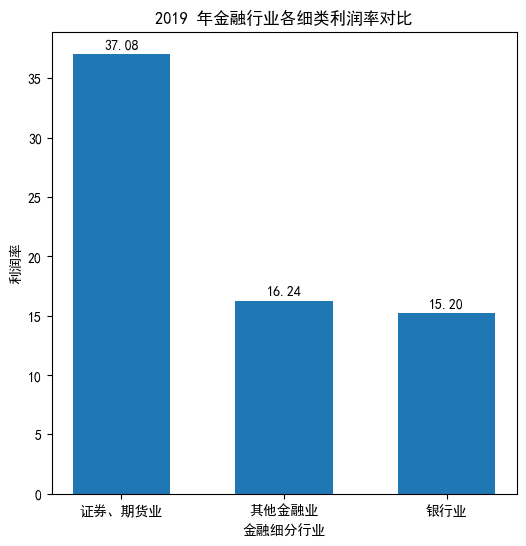

In [22]:
selected = (lr_new['Indnme']=='金融') & (lr_new['year']==2019) & (lr_new['month']==9)
picdata = lr_new[selected].groupby('Nindnme').agg({'利润率' : 'mean'}).sort_values('利润率', ascending=False).head(3)
picdata = picdata['利润率']

plt.figure(figsize=(6,6))
bar_width = 0.6
n = len(picdata)
plt.bar(np.arange(n), height=picdata, width=bar_width)
plt.xticks(np.arange(n), labels=picdata.index)
plt.xlabel('金融细分行业')
plt.ylabel('利润率')
plt.title('2019 年金融行业各细类利润率对比')
for i in range(n):
    plt.text(x=i, y=picdata[i]+0.3, s=f'{picdata[i]:.2f}', va='bottom', ha='center')
plt.show()

### 绘制饼图

In [23]:
selected = (lr_new['Nindnme']=='证券、期货业') & (lr_new['year']==2019) & (lr_new['month']==9)
picdata = lr_new[selected][['Stkcd','利润率']]
picdata = picdata.sort_values('利润率', ascending=False)

# print(picdata)
T1 = picdata.iloc[0, 0]

T1_data = lr_new[(lr_new['Stkcd'] == T1) & selected]

# 营业成本、  营业税金及附加、销售费用、  管理费用、   财务费用的饼图
# B001201000,B001207000    B001209000  B001210000  B001211000
T1_data = T1_data[['B001201000', 'B001207000', 'B001209000', 'B001210000', 'B001211000']]
T1_data.columns = ['营业成本', '营业税金及附加', '销售费用', '管理费用', '财务费用']
T1_data

,营业成本,营业税金及附加,销售费用,管理费用,财务费用
25656,289180011.2,31118310.78,245953275.2,1.077037e+09,9597721.44


             25656
营业成本     17.495452
营业税金及附加   1.882664
销售费用     14.880225
管理费用     65.160995
财务费用      0.580664


<Figure size 600x600 with 0 Axes>

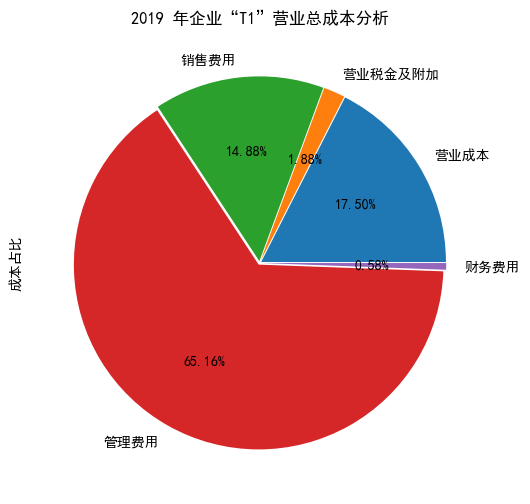

In [24]:
plt.figure(figsize=(6,6))
labels = T1_data.columns

expends = T1_data.agg(sum, axis=1)
T1_data_new = T1_data / expends.iloc[0] * 100
print(T1_data_new.T)

plt.figure(figsize=(6,6))
plt.pie(T1_data_new.T.iloc[:,0], explode=[0.01] * len(labels), labels=labels, autopct='%1.2f%%')
plt.title('2019 年企业“T1”营业总成本分析')
plt.ylabel('成本占比')

plt.show()

### 柱状图，折线图组合图

Text(0.5, 0, '月份')

<Figure size 800x600 with 0 Axes>

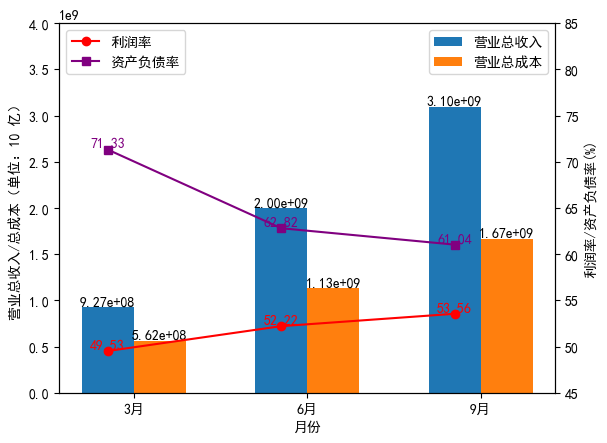

In [26]:
T1_data = lr_new[(lr_new['Stkcd'] == T1) & (lr_new['year']==2019) &(lr_new['month'] != 1)]

# 营业总收入、营业总成本的柱状图，绘制利润率、资产负债率变化的折线图
# 'B001100000', 'B001200000',  
T1_data = T1_data[['month', 'B001100000', 'B001200000', '利润率', '资产负债率']]
T1_data.columns = ['month', '营业总收入', '营业总成本', '利润率', '资产负债率']
T1_data.set_index('month', inplace=True)
T1_data

plt.figure(figsize=(8,6))
_, ax1 = plt.subplots() 
bar_width = 0.3 
incomes = T1_data['营业总收入']
costs = T1_data['营业总成本']
ax1.bar(np.arange(3), width=bar_width, height=incomes, label='营业总收入')
ax1.bar(np.arange(3)+bar_width, width=bar_width, height=costs, label='营业总成本')
for i in range(3):
    ax1.text(i, y=incomes.iloc[i], s=f'{incomes.iloc[i]:.2e}', va='bottom', ha='center')
    ax1.text(i+bar_width, y=costs.iloc[i], s=f'{costs.iloc[i]:.2e}', va='bottom', ha='center')
plt.xticks(np.arange(3)+bar_width/2, [f'{x}月' for x in T1_data.index])
ax1.legend(loc='upper right')
ax1.set_ylim(bottom=0.0, top=4.e9)
ax1.set_ylabel('营业总收入/总成本（单位：10 亿）')

# 绘制折线图
profits = T1_data['利润率']
minus = T1_data['资产负债率']
ax2 = plt.twinx()
ax2.plot(range(3), profits, label='利润率', color='red', marker='o')
ax2.plot(range(3), minus, label='资产负债率', color='purple', marker='s')
ax2.tick_params(axis='y')
ax2.legend(loc='upper left')
ax2.set_ylim(bottom=45, top=85)
# 在折线图的每个数据点上标识其值
for i in range(len(T1_data)):
    ax2.text(i, profits.iloc[i], f'{profits.iloc[i]:.2f}', ha='center', va='bottom', color='r', fontsize=10)
    ax2.text(i, minus.iloc[i], f'{minus.iloc[i]:.2f}', ha='center', va='bottom', color='purple', fontsize=10)
ax2.set_ylabel('利润率/资产负债率(%)')
ax1.set_xlabel('月份')
# plt.subplots_adjust(top=0.7)